<a href="https://colab.research.google.com/github/eleco/machine_learning_siraj/blob/master/project3/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150631 entries, 0 to 150631
Data columns (total 31 columns):
Time      150631 non-null int64
V1        150631 non-null float64
V2        150631 non-null float64
V3        150631 non-null float64
V4        150631 non-null float64
V5        150631 non-null float64
V6        150631 non-null float64
V7        150631 non-null float64
V8        150631 non-null float64
V9        150631 non-null float64
V10       150631 non-null float64
V11       150631 non-null float64
V12       150631 non-null float64
V13       150631 non-null float64
V14       150631 non-null float64
V15       150631 non-null float64
V16       150631 non-null float64
V17       150631 non-null float64
V18       150631 non-null float64
V19       150631 non-null float64
V20       150631 non-null float64
V21       150631 non-null float64
V22       150631 non-null float64
V23       150631 non-null float64
V24       150631 non-null float64
V25       150631 non-null float64
V26    

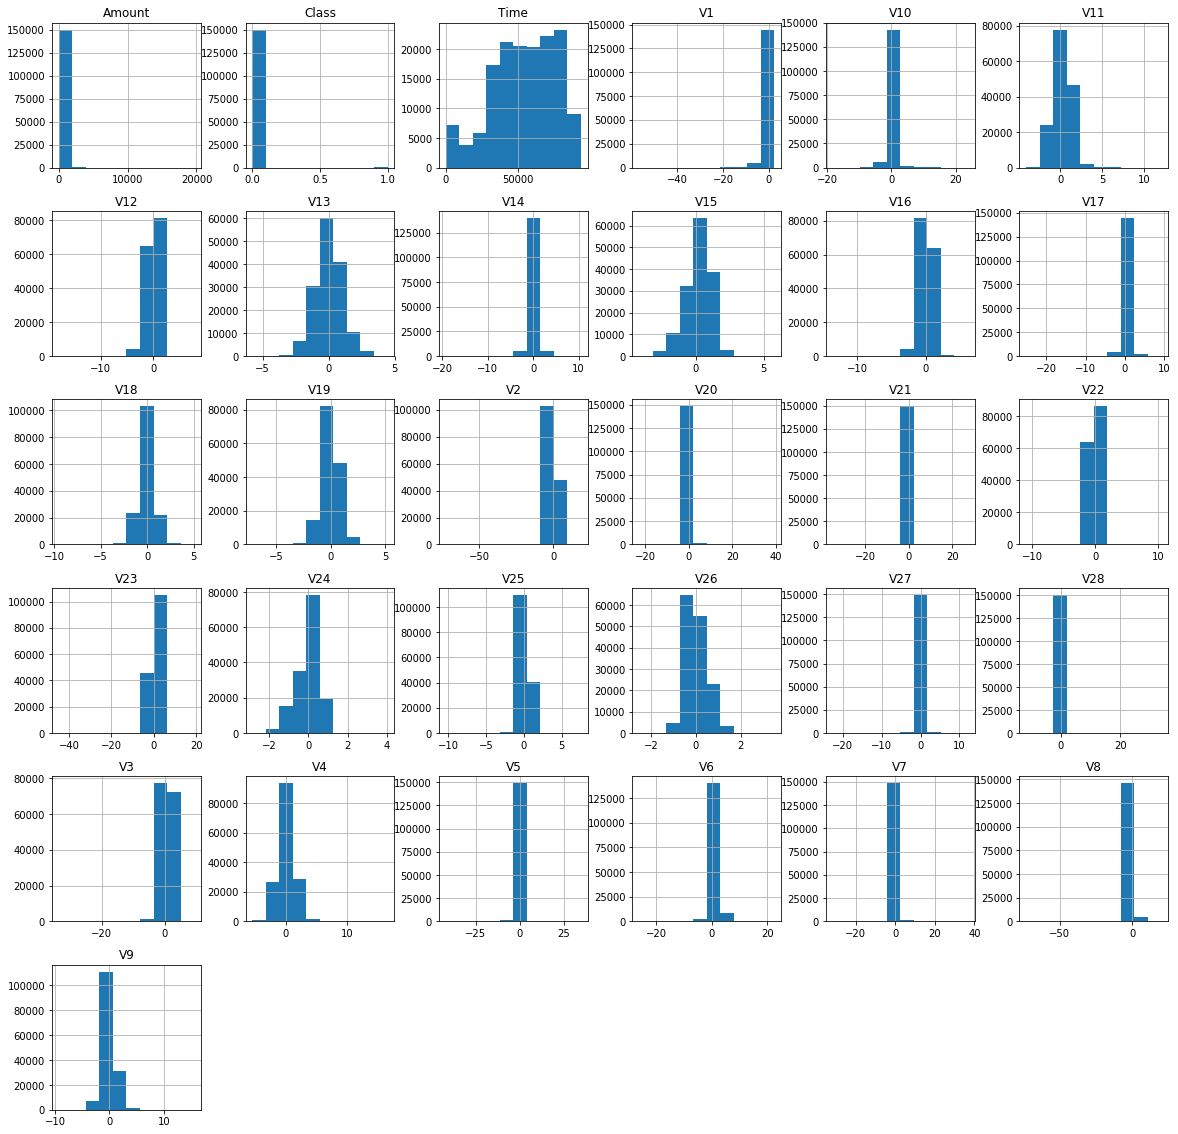

fraud cases-----------------------
294
         Time         V1        V2  ...       V28  Amount  Class
149828  56098  -1.229669  1.956099  ...  0.075309  170.92    1.0
149836  41397 -14.970346  8.401421  ... -1.104819  273.01    1.0
150162  77154  -0.715414  0.608590  ...  0.008433  129.00    1.0
150295  40918  -3.140260  3.367342  ...  0.397557    0.76    1.0
150329  62330   1.140865  1.221317  ...  0.122988    1.00    1.0

[5 rows x 31 columns]
non fraud cases--------------------
150337
         Time         V1        V2  ...       V28  Amount  Class
149828  56098  -1.229669  1.956099  ...  0.075309  170.92    1.0
149836  41397 -14.970346  8.401421  ... -1.104819  273.01    1.0
150162  77154  -0.715414  0.608590  ...  0.008433  129.00    1.0
150295  40918  -3.140260  3.367342  ...  0.397557    0.76    1.0
150329  62330   1.140865  1.221317  ...  0.122988    1.00    1.0

[5 rows x 31 columns]


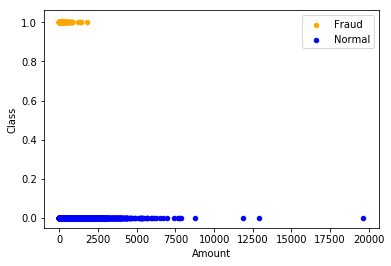

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


decision:  [ -7.05569532  -7.79892464  -6.40464192 ... -11.10155669  -7.1736184
  -7.41216361]
coef:  [[-4.35365841e-05  8.69614239e-02 -3.89463350e-01 -5.70563232e-01
   2.84512175e-01 -1.61125998e-01  2.45568782e-02  4.57168176e-01
  -2.64846601e-01 -4.57677656e-01 -5.05648803e-01 -3.63591888e-01
   1.16938113e-01 -4.91148379e-01 -6.72742610e-01 -4.36492857e-01
  -8.27147994e-02 -1.51797367e-01  1.56988068e-01 -5.66107445e-02
   1.81269447e-01  5.85130952e-01  6.05801183e-01  1.60240513e-01
  -4.11686656e-02 -5.13908984e-01  1.64135957e-01 -1.95496519e-01
   7.97373801e-02 -4.77608138e-03]]
Score:  0.9988846991343141
Params:  {'C': 100000.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Classification report-----------------
              precision    recall  f1-score 

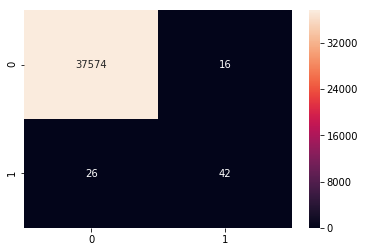

In [3]:
import numpy as np
import pandas as pd
import random

import sklearn as sk
from sklearn import linear_model
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

#Parse and analyse raw data
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df = df[np.isfinite(df).all(1)] 

df.info()
print(df.tail(10))
df.hist(figsize = (20, 20))
plt.show()

fraud = df.loc[df['Class'] == 1]
non_fraud = df.loc[df['Class'] == 0]

print('fraud cases-----------------------')
print(len(fraud))
print(fraud.tail())

print('non fraud cases--------------------')
print(len(non_fraud))
print(fraud.tail())

ax = fraud.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_fraud.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()


#Model engineering
x = df.iloc[:,:-1]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25)

logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train, y_train)
print ("decision: ",logistic.decision_function(X_train))
print("coef: ", logistic.coef_) 
print('Score: ', logistic.score(X_test, y_test))
print('Params: ', logistic.get_params())

y_predicted = logistic.predict(X_test);

#Ouput predicted results
print("Classification report-----------------")
print(classification_report(y_test, y_predicted))
print("Confusion matrix----------------------")
cm=confusion_matrix(y_test, y_predicted)
print(cm)
print("Accuracy score-----------------------")
print(accuracy_score(y_test, y_predicted))
sns.heatmap(cm, annot=True, fmt='d')

df1 = pd.DataFrame({'Actual':y_test, 'Predicted': y_predicted})
print(df1.head(25))
